# Multimodal RAG Testing - Interactive Notebook

This notebook demonstrates the multimodal RAG system with:
- Clean text display
- Readable table formatting
- Image visualization
- Metadata inspection

In [1]:
# Install required packages if needed
# !pip install requests pillow pandas matplotlib IPython

In [2]:
import requests
from PIL import Image
import pandas as pd
import re
from IPython.display import display, HTML, Markdown
import matplotlib.pyplot as plt
from io import StringIO

## 1. Search Documents

In [3]:
# Configure search
API_URL = "http://localhost:8080"
USER_ID = "testuser"
QUERY = "What is SFT"
TOP_K = 1

# Perform search
response = requests.post(
    f"{API_URL}/api/users/{USER_ID}/search",
    json={"query": QUERY, "top_k": TOP_K}
)

# Get result
result = response.json()['results'][0]

print(f"✅ Search completed!")
print(f"📊 Score: {result['score']:.4f}")
print(f"🖼️  Images found: {len(result['images'])}")

✅ Search completed!
📊 Score: 0.7975
🖼️  Images found: 2


## 2. Display Text Content

In [4]:
# Extract text
text = result['content']

# Display as markdown for better formatting
display(Markdown(f"### Retrieved Text Content\n\n{text}"))

### Retrieved Text Content

though multilingual alignment and domain-specific data were excluded for future exploration. The SFT data underwent multiple rounds of SimHash deduplication with a bucket size of 1 million, improving performance by 1.7% compared to non-deduplicated data. Data ratio experiments revealed the effectiveness of instruction-formatted SFT data during the annealing phase, leading us to allocate 64% to SFT data. These adjustments, combined with optimized data mixing and processing, improved complex reasoning performance by 29.31% compared to our baseline. ## 2.5 Training Loss Figure 3 presents the training loss curve on the FineWeb-Edu dataset [Penedo et al., 2024]. The initial drop corresponds to increasing the batch size from 2M to 4M, which likely replicates the stabilizing effect of a reduced learning rate [Smith et al., 2018]. The second drop reflects the impact of the learning rate decay phase. --- ![Image 2](image_ref:./extracted_images/_10__2521c54446c0.png) Figure 2: Data mixture of different training stages. The left side represents the stable training phase, and the right side represents the decay phase. ![Image 3](image_ref:./extracted_images/_10__a45ce6fb7237.png) Figure 3: Loss curve for Xmodel-2-1.2B. # 3 Results We compared Xmodel-2 with recent decoder-only models containing 1–2 billion parameters, as identified in [Lu et al., 2024]. The baselines include TinyLLaMA [Zhang et al., 2024], InternLM2 [Cai et al., 2024], Qwen2 [Yang et al., 2024], MiniCPM [Hu et al., 2024], Llama 3 [Grattafiori et al., 2024], Phi-1.5 [Li et al., 2023b], StableLM-2 [Bellagente et al., 2024], OLMo [Groeneveld et al., 2024], MobiLlama [Thawakar et al., 2024], and SmolLM [Allal et al., 2024]. Our experiments demonstrate that Xmodel-2 achieves **state-of-the-art (SOTA)** performance among 1B-parameter models, demonstrating the effectiveness of our training strategies and optimized data ratios, especially in commonsense reasoning, complex reasoning and agent-based tasks. ## 3.1 Commonsense Reasoning We evaluate Xmodel-2 on various commonsense reasoning benchmarks using the Language Model Evaluation Harness [Gao et al., 2021], which includes: ARC-Challenge [Clark et al., 2018], ARC-Easy [Clark et al., 2018], BoolQ [Clark et al., 2019], HellaSwag [Zellers et al., 2019], OpenBookQA [Mihaylov et al., 2018], PiQA [Bisk et al., 2019], SciQ [Welbl et al., 2017], TriviaQA [Joshi et al., --- 2017], and Winogrande [Sakaguchi et al., 2021]. For fairness and reproducibility, all models were evaluated in the same environment using raw accuracy metrics. Table 2 presents the zero-shot evaluation results, models in green perform worse than Xmodel-2, while models in red outperform Xmodel-2. In this evaluation, Xmodel-2 outperforms the majority of baseline models and demonstrates competitive performance. <table><thead><tr><th>Model</th><th>ARC-c</th><th>ARC-e</th><th>Boolq</th><th>HS.</th><th>OB.</th><th>PiQA</th><th>SciQ</th><th>Wino.</th><th>Avg</th></tr></thead><tbody><tr><td>MobiLlama-1B</td><td>28.24</td><td>61.53</td><td>60.92</td><td>46.74</td><td>21.80</td><td>75.14</td><td>88.20</td><td>59.27</td><td>55.23</td></tr><tr><td>TinyLLaMA1.1-1.1B</td><td>30.97</td><td>61.66</td><td>55.99</td><td>46.70</td><td>25.20</td><td>72.63</td><td>89.30</td><td>59.43</td><td>55.24</td></tr><tr><td>OLMo-1B</td><td>28.67</td><td>63.34</td><td>61.74</td><td>46.97</td><td>25.00</td><td>75.03</td><td>87.00</td><td>59.98</td><td>55.97</td></tr><tr><td>OpenELM-1.1B</td><td>28.84</td><td>62.37</td><td>63.58</td><td>48.36</td><td>25.40</td><td>74.76</td><td>90.60</td><td>61.72</td><td>56.95</td></tr><tr><td>Llama-3.2-1B</td><td>31.31</td><td>65.36</td><td>63.73</td><td>47.78</td><td>26.40</td><td>74.48</td><td>91.50</td><td>61.01</td><td>57.70</td></tr><tr><td>MiniCPM-1.2B</td><td>36.86</td><td>70.29</td><td>67.92</td><td>49.91</td><td>23.60</td><td>74.43</td><td>91.80</td><td>60.77</td><td>59.45</td></tr><tr><td>Fox-1-1.6B</td><td>34.73</td><td>69.91</td><td>71.77</td><td>46.33</td><td>24.60</td><td>75.24</td><td>93.20</td><td>60.77</td><td>59.57</td></tr><tr><td>InternLM2.5-1.8B</td><td>35.24</td><td>66.37</td><td>79.82</td><td>46.99</td><td>22.00</td><td>73.29</td><td>94.90</td><td>62.67</td><td>60.16</td></tr><tr><td>Qwen2-1.5B</td><td>33.11</td><td>66.41</td><td>72.60</td><td>48.57</td><td>27.00</td><td>75.57</td><td>94.60</td><td>65.75</td><td>60.45</td></tr><tr><td>StableLM-2-zephyr-1.6B</td><td>36.52</td><td>66.79</td><td>80.00</td><td>53.26</td><td>26.80</td><td>74.86</td><td>88.00</td><td>64.09</td><td>61.29</td></tr><tr><td>SmolLM-1.7B</td><td>43.43</td><td>76.47</td><td>65.93</td><td>49.58</td><td>30.00</td><td>75.79</td><td>93.20</td><td>60.93</td><td>61.92</td></tr><tr><td>Qwen2.5-1.5B</td><td>41.21</td><td>75.21</td><td>72.97</td><td>50.15</td><td>31.80</td><td>75.90</td><td>94.30</td><td>63.61</td><td>63.14</td></tr><tr><td>DCLM-1B</td><td>41.30</td><td>74.79</td><td>71.41</td><td>53.59</td><td>32.20</td><td>76.93</td><td>94.00</td><td>66.22</td><td>63.81</td></tr><tr><td>Phi-1.5-1.3B</td><td>44.80</td><td>76.22</td><td>74.95</td><td>47.96</td><td>38.60</td><td>76.66</td><td>93.30</td><td>72.93</td><td>65.68</td></tr><tr><td>Xmodel-2-1.2B</td><td>39.16</td><td>71.55</td><td>74.65</td><td>47.45</td><td>29.20</td><td>74.81</td><td>93.60</td><td>63.93</td><td>61.79</td></tr></tbody></table> 

## 3. Extract and Display Tables

In [5]:
def extract_tables_from_html(text):
    """Extract HTML tables from text and convert to pandas DataFrames"""
    # Find all <table> tags
    table_pattern = r'<table>.*?</table>'
    tables = re.findall(table_pattern, text, re.DOTALL)
    
    dataframes = []
    for idx, table_html in enumerate(tables):
        try:
            # Use pandas to parse HTML table
            df = pd.read_html(StringIO(table_html))[0]
            dataframes.append((idx + 1, df))
        except Exception as e:
            print(f"Warning: Could not parse table {idx + 1}: {e}")
    
    return dataframes

# Extract tables
tables = extract_tables_from_html(text)

if tables:
    print(f"📊 Found {len(tables)} table(s)\n")
    for table_num, df in tables:
        print(f"\n{'='*80}")
        print(f"Table {table_num}")
        print(f"{'='*80}")
        display(df)
else:
    print("No tables found in this chunk")

📊 Found 1 table(s)


Table 1


,Model,ARC-c,ARC-e,Boolq,HS.,OB.,PiQA,SciQ,Wino.,Avg
0,MobiLlama-1B,28.24,61.53,60.92,46.74,21.8,75.14,88.2,59.27,55.23
1,TinyLLaMA1.1-1.1B,30.97,61.66,55.99,46.70,25.2,72.63,89.3,59.43,55.24
2,OLMo-1B,28.67,63.34,61.74,46.97,25.0,75.03,87.0,59.98,55.97
3,OpenELM-1.1B,28.84,62.37,63.58,48.36,25.4,74.76,90.6,61.72,56.95
4,Llama-3.2-1B,31.31,65.36,63.73,47.78,26.4,74.48,91.5,61.01,57.70
5,MiniCPM-1.2B,36.86,70.29,67.92,49.91,23.6,74.43,91.8,60.77,59.45
6,Fox-1-1.6B,34.73,69.91,71.77,46.33,24.6,75.24,93.2,60.77,59.57
7,InternLM2.5-1.8B,35.24,66.37,79.82,46.99,22.0,73.29,94.9,62.67,60.16
8,Qwen2-1.5B,33.11,66.41,72.60,48.57,27.0,75.57,94.6,65.75,60.45
9,StableLM-2-zephyr-1.6B,36.52,66.79,80.00,53.26,26.8,74.86,88.0,64.09,61.29


## 4. Display Images

🖼️  Displaying 2 image(s):

  ✓ ./extracted_images/_10__2521c54446c0.png
    Size: 1098x394 pixels
    Mode: RGB

  ✓ ./extracted_images/_10__a45ce6fb7237.png
    Size: 775x592 pixels
    Mode: RGB



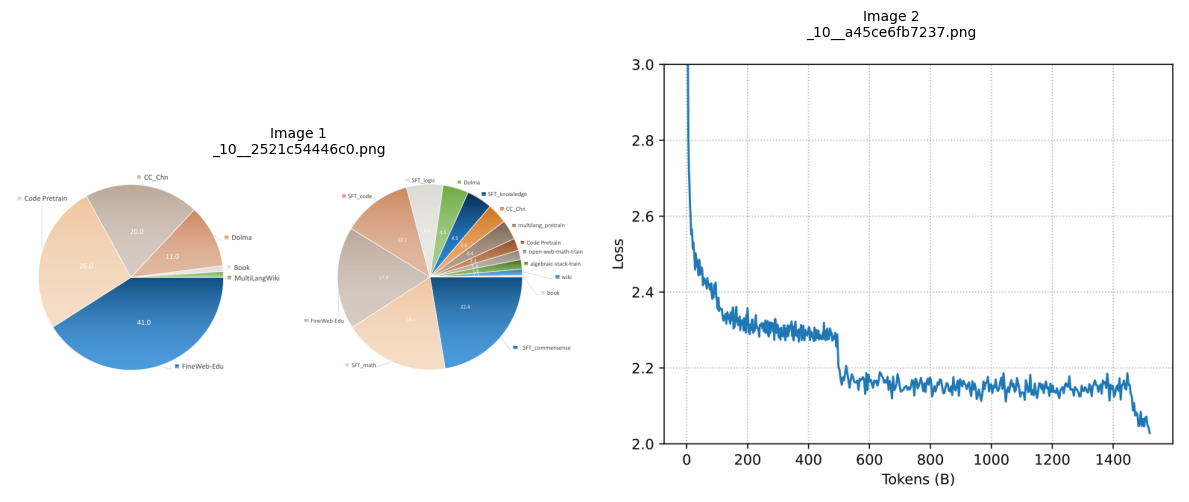

In [6]:
# Extract image paths
image_paths = result['images']

if image_paths:
    print(f"🖼️  Displaying {len(image_paths)} image(s):\n")
    
    # Create figure with subplots
    n_images = len(image_paths)
    fig, axes = plt.subplots(1, n_images, figsize=(6 * n_images, 6))
    
    # Handle single image case
    if n_images == 1:
        axes = [axes]
    
    for idx, img_path in enumerate(image_paths):
        try:
            # Load and display image
            img = Image.open(img_path)
            axes[idx].imshow(img)
            axes[idx].axis('off')
            axes[idx].set_title(f"Image {idx + 1}\n{img_path.split('/')[-1]}", 
                               fontsize=10, pad=10)
            
            print(f"  ✓ {img_path}")
            print(f"    Size: {img.size[0]}x{img.size[1]} pixels")
            print(f"    Mode: {img.mode}\n")
        except Exception as e:
            print(f"  ✗ Error loading {img_path}: {e}\n")
            axes[idx].text(0.5, 0.5, f"Error loading image", 
                          ha='center', va='center')
            axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("No images found in this chunk")

## 8. Interactive Query (Optional)

In [14]:
# Try a different query
def search_and_display(query, top_k=1):
    """Search and display results for any query"""
    response = requests.post(
        f"{API_URL}/api/users/{USER_ID}/search",
        json={"query": query, "top_k": top_k}
    )
    
    results = response.json()['results']
    
    for idx, result in enumerate(results, 1):
        print(f"\n{'='*80}")
        print(f"Result {idx}/{len(results)}")
        print(f"{'='*80}")
        print(f"Score: {result['score']:.4f}")
        print(f"Images: {len(result['images'])}")
        print(f"\nText preview (first 300 chars):")
        print(result['content'] + "...")
        
        if result['images']:
            print(f"\nImages:")
            for img_path in result['images']:
                print(f"  - {img_path}")

# Example: Try your own query
# search_and_display("training loss curve", top_k=2)

In [15]:
search_and_display("What is SFT", top_k=1)


Result 1/1
Score: 0.7975
Images: 2

Text preview (first 300 chars):
though multilingual alignment and domain-specific data were excluded for future exploration. The SFT data underwent multiple rounds of SimHash deduplication with a bucket size of 1 million, improving performance by 1.7% compared to non-deduplicated data. Data ratio experiments revealed the effectiveness of instruction-formatted SFT data during the annealing phase, leading us to allocate 64% to SFT data. These adjustments, combined with optimized data mixing and processing, improved complex reasoning performance by 29.31% compared to our baseline. ## 2.5 Training Loss Figure 3 presents the training loss curve on the FineWeb-Edu dataset [Penedo et al., 2024]. The initial drop corresponds to increasing the batch size from 2M to 4M, which likely replicates the stabilizing effect of a reduced learning rate [Smith et al., 2018]. The second drop reflects the impact of the learning rate decay phase. --- ![Image 2](image_ref:.